In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('train_transaction.csv')
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.shape

(590540, 394)

In [6]:
# df.columns.tolist() 
## selecting categorical & numerical features in seperate lists
numerical_features   = df.drop('isFraud', axis = 1).select_dtypes(np.number).columns
categorical_features = df.select_dtypes(np.object).columns

In [4]:
df[numerical_features].head(10)

NameError: name 'numerical_features' is not defined

In [ ]:
df[categorical_features].head(10)

# Target Analysis

    - Discrete/continuous
    - Is it balanced or not
    - if nan present or not

In [19]:
df.isFraud.unique()
# discrete values,hence categorical in nature

array([0, 1])

In [20]:
df.isFraud.isnull().sum()

0

#### Is it balanced or not ?


In [25]:
## number of 1's and 0's in the target variable
# method 1
print(df[df.isFraud==0].shape)
print(df[df.isFraud==1].shape)

print("percentage of 1/'s in the data: {}".format((len(df[df.isFraud==1])/len(df))*100))
print("percentage of 0/'s in the data: {}".format((len(df[df.isFraud==0])/len(df))*100))

(569877, 394)
(20663, 394)
percentage of 1/'s in the data: 3.4990009144173126
percentage of 0/'s in the data: 96.50099908558268


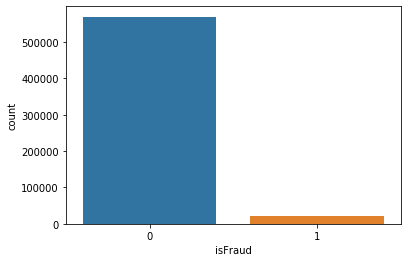

In [23]:
# method 2 - plotting
import seaborn as sns
sns.countplot(df['isFraud'])

# univariate analysis
    Histogram
    Missing values handling
    Normality check
    Encoding
    Outliers handling
    Dimensionality reduction

### Missing values handling
#### why do we need to handle missing values?
  ##### data representation is not correct with missing values
  ##### models do not take missing values as they are - NaN's processing is not supported
#### How to handl missing values?

In [27]:
# numerical features
df[numerical_features].head(2)
df[df.isFraud==1].head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
203,2987203,1,89760,445.000,W,18268,583.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,2987240,1,90193,37.098,C,13413,103.0,185.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,2987243,1,90246,37.098,C,13413,103.0,185.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,2987245,1,90295,37.098,C,13413,103.0,185.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288,2987288,1,90986,155.521,C,16578,545.0,185.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df[numerical_features].isnull().sum()

TransactionID          0
TransactionDT          0
TransactionAmt         0
card1                  0
card2               8933
card3               1565
card5               4259
addr1              65706
addr2              65706
dist1             352271
dist2             552913
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
C14                    0
D1                  1269
D2                280797
D3                262878
D4                168922
D5                309841
                   ...  
V310                  12
V311                  12
V312                  12
V313                1269
V314                1269
V315                1269
V316                  12
V317                  12
V318                  12


In [38]:
df['V316'].head()

0     0.0
1     0.0
2     0.0
3    50.0
4     0.0
Name: V316, dtype: float64

In [35]:
## filling missing values
df['V316'].fillna(0, inplace = True)

In [ ]:
### Outliers handling
#### why do we need to handle outliers?
  
#### How to handl outiers values?

## Histogram plot

In [3]:
import matplotlib.pyplot as plt

In [ ]:
plt.hist(df[['C1']])
plt.show()

In [ ]:
### Outliers handling
#### why do we need to handle outliers?
  
#### How to handl outiers values?
 - remove outliers
 - scatter plot

In [15]:
l = [1,2,3,4,5,2,3,2,4,1,3,4,5,5,5,5,5]
np.mean(l)

3.4705882352941178

In [16]:
np.mean([1,2,3,4,5,2,3,2,4,1,3,4,5,5,5,5,5])

7.166666666666667

In [ ]:
IQR = Q3 - Q1 

Q1- 1.5IQR
Q3 + 1.5 IQR 


In [ ]:
## Normality check
# -- if your data is normality distributed or close to that

###  transformation 
### positively skewed -> apply log, square root, 
### negatively skewed -> power of the data 

In [18]:
### Encoding

df[categorical_features].head()

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,W,discover,credit,NaN,NaN,T,T,T,M2,F,T,NaN,NaN,NaN
1,W,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,W,visa,debit,outlook.com,NaN,T,T,T,M0,F,F,F,F,F
3,W,mastercard,debit,yahoo.com,NaN,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,H,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df['ProductCD'].unique()

array(['W', 'H', 'C', 'S', 'R'], dtype=object)

In [26]:
# OHE
# Label encoding


In [23]:
df['ProductCD'].head()

0    W
1    W
2    W
3    W
4    H
Name: ProductCD, dtype: object

In [25]:
n_df = pd.get_dummies(df[categorical_features])
n_df.head()

,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_charge card,...,M5_F,M5_T,M6_F,M6_T,M7_F,M7_T,M8_F,M8_T,M9_F,M9_T
0,0,0,0,0,1,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# example of label conding
.replace({'first':3,'second':2})

In [ ]:
### Dimensionality reduction
#      - reduce memory consumption
#      - reduce/remove less informative data/columns 

# -- Methods
#  - cleaning methods
#  - PCA 

In [ ]:
# Bivariate analysis
        # Correlation check/multi-collinearity check
        # Pair-plot
        # Scatter plot
        # Outliers handling


//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


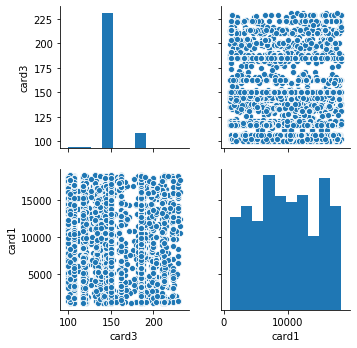

In [9]:
import seaborn as sns
sns.pairplot(df[['card3','card1']])

In [7]:
numerical_features

Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'card1', 'card2',
       'card3', 'card5', 'addr1', 'addr2', 'dist1',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=379)

In [ ]:
corr_coef